In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [7]:
df = pd.read_csv("./match_data_yearly/all_years.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
Date,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500.000000,1500.000000,0.000000,0.000000
2006-03-05,2006,1,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500.000000,1500.000000,0.000000,0.000000
2006-03-05,2006,1,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500.000000,1500.000000,0.000000,0.000000
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500.000000,1500.000000,0.000000,0.000000
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500.000000,1500.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594.223262,1560.240999,4.238372,-5.817036
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.711944,1524.417742,9.010605,-13.070625
2020-12-19,2020,34,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453.298544,1457.903358,17.121750,7.296910


In [8]:
accuracies = []
y_pred_probas = []



def predict(year):
    df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
    
    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    
    df_future = df[f"{year}"]
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values
    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)
    y_pred_probas.append(y_pred_proba) 
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
#     print(len(df_future[df_future["W/L"]==0]),len(df_future[df_future["W/L"]==1]),len(df_future[df_future["W/L"]==2]))
#     print(np.sum(y_pred_proba, axis=0))

In [9]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

In [10]:
accuracies

[0.5196078431372549,
 0.4444444444444444,
 0.47058823529411764,
 0.48366013071895425,
 0.45098039215686275,
 0.40522875816993464,
 0.4444444444444444,
 0.4542483660130719,
 0.5326797385620915,
 0.4477124183006536,
 0.4673202614379085,
 0.5,
 0.45751633986928103,
 0.42483660130718953,
 0.4411764705882353,
 0.46405228758169936,
 0.5294117647058824,
 0.4411764705882353,
 0.45751633986928103,
 0.4869281045751634,
 0.4542483660130719,
 0.4117647058823529,
 0.45098039215686275,
 0.45751633986928103,
 0.5196078431372549,
 0.4477124183006536,
 0.46405228758169936,
 0.5,
 0.4477124183006536,
 0.4150326797385621,
 0.45098039215686275,
 0.47058823529411764,
 0.5359477124183006,
 0.4411764705882353,
 0.4673202614379085,
 0.4934640522875817,
 0.45751633986928103,
 0.3954248366013072,
 0.4444444444444444,
 0.47058823529411764,
 0.5228758169934641,
 0.4411764705882353,
 0.43790849673202614,
 0.4869281045751634,
 0.4444444444444444,
 0.39869281045751637,
 0.4477124183006536,
 0.477124183006536,
 0.542

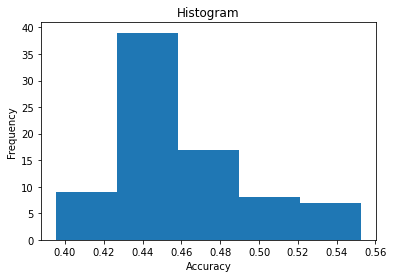

In [11]:
n, bins, patches=plt.hist(accuracies, bins=5)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [12]:
np.mean(accuracies)

0.4625000000000001